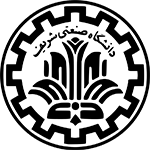

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
 Deep Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department - Fall 2025  <br>
<font color=3C99D size=5>
          Homework 4<br>
<font color=696880 size=4>

**Name**: Ali Soltani
  
**Student ID**: 403203449

# 🛢️ Oil Price Prediction using Time Series Models 📈

This notebook is designed for students to complete tasks related to oil price prediction using different machine learning models. 🚀

## 📚 References
- 📊 [Dataset: Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)
- 📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)

## 1️⃣ Introduction
🔍 One of the most common applications of recurrent neural networks is **time series forecasting**. In this assignment, you will predict **crude oil prices** using four different methods. 💡

## 2️⃣ Dataset and Preprocessing (25 Points)

### 📥 2.1 Download Dataset
📌 Download the dataset from **Yahoo Finance** for `CL=F` from **2010 to the present**.
[Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)

### 🎯 2.2 Select Features
✅ Select the `Adj Close` column as the **main feature**.

### ⚠️ **2.3 Handle Missing Data**

You will encounter missing data (`null` values) within your dataset. Follow these detailed steps carefully to handle the missing values and create a complete, reliable dataset:

#### 📝 Step 1: Introduce Random Missing Data
- Identify all indices in the `Adj Close` column that currently have valid (non-null) data.
- Set a random seed (`np.random.seed(42)`) for reproducibility.
- Randomly select **10%** of these valid indices and set their values to `NaN`.

#### 🔍 Step 2: Identify Missing Values
- Identify all dates where at least one column has a missing value (`NaN`).
- Print the number of missing dates and the total number of dates to evaluate the extent of missingness.

#### 🔧 Step 3: Replace Missing Values
- Create a copy of the `Adj Close` column for filling purposes.
- First, apply **linear interpolation** to estimate missing values based on surrounding data points.
- Then, use backward fill (`bfill`) followed by forward fill (`ffill`) methods to handle any remaining missing values at the start or end of the dataset.

#### 🎯 Outcome:
After completing these steps, your dataset will have no missing values in the `Adj Close` column, ready for further analysis or modeling.

🛠 *Your task:* Implement the missing data handling methods below. (16 Points)

In [2]:
import yfinance as yf
import pandas as pd

# TO Do: Read the data and print 5 examples
data = yf.download("CL=F", start="2010-01-01")
df = data[['Close']].copy()
df.columns = ['Adj Close']

print(df.head(5))

/tmp/ipykernel_55/4185950841.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("CL=F", start="2010-01-01")
[*********************100%***********************]  1 of 1 completed

            Adj Close
Date                 
2010-01-04  81.510002
2010-01-05  81.769997
2010-01-06  83.180000
2010-01-07  82.660004
2010-01-08  82.750000


In [3]:
# TO DO: Introduce random null
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Identify all indices with valid (non-null) data
valid_indices = df[df['Adj Close'].notna()].index

# Randomly select 10% of valid indices
num_to_null = int(len(valid_indices) * 0.1)
random_indices = np.random.choice(len(valid_indices), size=num_to_null, replace=False)
selected_indices = valid_indices[random_indices]

# Set these values to NaN
df.loc[selected_indices, 'Adj Close'] = np.nan

print(df.head())

            Adj Close
Date                 
2010-01-04  81.510002
2010-01-05  81.769997
2010-01-06  83.180000
2010-01-07  82.660004
2010-01-08  82.750000


In [4]:
# TO DO: Identify missing dates and null values

# Identify all dates where at least one column has a missing value
missing_dates = df[df['Adj Close'].isna()]

# Print the number of missing dates and total dates
num_missing_dates = len(missing_dates)
num_all_dates = len(df)

print(f"Num of missing dates:\n{num_missing_dates}\n")
print(f"Num of all dates:\n{num_all_dates}")

Num of missing dates:
404

Num of all dates:
4044


In [5]:
# TO DO: Fill missing values using .interpolate or .fillna(method='bfill').fillna(method='ffill')  

# Apply linear interpolation
df['Adj Close'] = df['Adj Close'].interpolate(method='linear')

# Use backward fill (bfill) followed by forward fill (ffill) for any remaining NaN values
df['Adj Close'] = df['Adj Close'].bfill().ffill()

# Verify no missing values remain
print(f"Missing values after filling: {df['Adj Close'].isna().sum()}")
print(df.head())

Missing values after filling: 0
            Adj Close
Date                 
2010-01-04  81.510002
2010-01-05  81.769997
2010-01-06  83.180000
2010-01-07  82.660004
2010-01-08  82.750000


### ✂️ 2.4 Train-Test Split and Normalization
- **Split** the dataset into **training and test sets** based on the ratio given in the reference paper.
- **Normalize** the data.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)

🛠 *Your task:* Implement the splitting and normalization below. (4 Points)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def temporal_split(series, train_ratio=0.6, val_ratio=0.2):
    #TO DO
    n = len(series)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))
    train = series.iloc[:train_end]
    val = series.iloc[train_end:val_end]
    test = series.iloc[val_end:]
    return train, val, test

filled_data = df.copy()
train_list, val_list, test_list = [], [], []

train, val, test = temporal_split(filled_data)
train_list.append(train)
val_list.append(val)
test_list.append(test)

train_data = pd.concat(train_list)
val_data = pd.concat(val_list)
test_data = pd.concat(test_list)


scaler = MinMaxScaler()
train_data['Adj Close'] = scaler.fit_transform(train_data[['Adj Close']])
test_data['Adj Close'] = scaler.transform(val_data[['Adj Close']])
test_data['Adj Close'] = scaler.transform(test_data[['Adj Close']])
print("Training data sample:")
print(train_data.head())
print("Testing data sample:")
print(test_data.head())

Training data sample:
            Adj Close
Date                 
2010-01-04   0.628977
2010-01-05   0.631952
2010-01-06   0.648089
2010-01-07   0.642138
2010-01-08   0.643168
Testing data sample:
            Adj Close
Date                 
2022-11-10  -0.300157
2022-11-11  -0.300017
2022-11-14  -0.299895
2022-11-15  -0.300106
2022-11-16  -0.300258


### 📊 2.5 Data Visualization
- **Plot a histogram** similar to **Figure 6** in the reference paper, showing the **distribution of oil prices**.

🛠 *Your task:* Implement the histogram plot below. (5 Points)

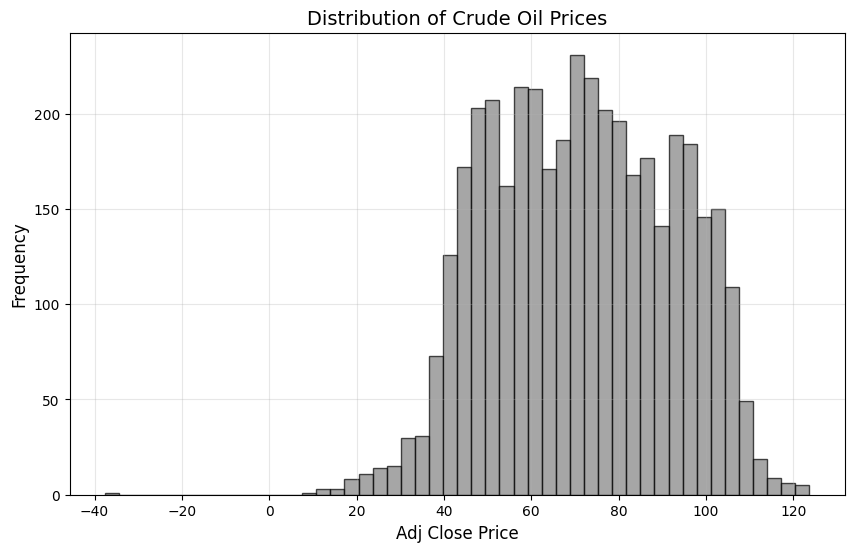

In [9]:
# TO DO: Plot histogram of 'Adj Close'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Adj Close'].dropna(), bins=50, color='gray', alpha=0.7, edgecolor='black')
plt.xlabel('Adj Close Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Crude Oil Prices', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## 3️⃣ Implementing Deep Learning Models 🤖 (60 Points)

The reference paper utilizes **three models** for time series forecasting:
- `RNN`
- `LSTM`
- `GRU`

📌 **Train** each model using the **hyperparameters** given in **Table 4** of the paper.
📌 Use `Mean Square Error (MSE)` as the **loss function**.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)


### Important Details & Clarifications

- **What to Predict?**  
  The goal is to predict **the actual next-day price** (regression problem), rather than just identifying price increase or decrease.
  
- **Input/Output Structure:**  
  - **Input:** A window of \( k \) consecutive daily prices (e.g., 50 days).  
  - **Output:** The predicted price for the next day.
  
- **How to Evaluate?**  
  Use the four metrics (RMSE, MAE, MAPE, \( R^2 \)) to gauge how accurately your model tracks the real price values.

- **Target Accuracy:**  
  Your accuracy might differ from the paper’s due to factors like data splitting, normalization, or different random seeds. However, aim to closely replicate the paper’s results or provide justifications for any discrepancy.

**Final Deliverables:**
1. **All four trained models** (RNN, LSTM, GRU).  
2. **Comparison plots** of predicted vs. actual values (in both normalized and original price scales, if desired).  
3. **Performance metrics** (RMSE, MAE, MAPE, \( R^2 \)) for each model, presented in a table or a concise summary.


🛠 *Your task:* Implement these models below. (30 Points)

In [18]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

def create_sequences(data, window_size):
    """
    Create sequences for time series prediction.
    
    Parameters:
    - data: array-like, time series data
    - window_size: int, number of time steps to use as input
    
    Returns:
    - X: input sequences of shape (num_samples, window_size)
    - y: target values of shape (num_samples, 1)
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)
    #TO DO

window_size = 50
#TO DO: make test and train loader

# Create sequences for train, validation, and test data
X_train, y_train = create_sequences(train_data['Adj Close'].values, window_size)
X_val, y_val = create_sequences(val_data['Adj Close'].values, window_size)
X_test, y_test = create_sequences(test_data['Adj Close'].values, window_size)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).unsqueeze(-1)  # Add feature dimension
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(-1)
X_val_tensor = torch.FloatTensor(X_val).unsqueeze(-1)
y_val_tensor = torch.FloatTensor(y_val).unsqueeze(-1)
X_test_tensor = torch.FloatTensor(X_test).unsqueeze(-1)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(-1)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
# LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Get output from the last time step
        out = self.fc(out[:, -1, :])
        return out
    #TO DO

lstm_model = LSTMModel()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

def train_model(model, train_loader, test_loader, epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                val_loss += loss.item()
        
        val_loss /= len(test_loader)
        val_losses.append(val_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    
    return train_losses, val_losses
    #TO DO

train_model(lstm_model, train_loader, test_loader)

Epoch [10/100], Train Loss: 0.000799, Val Loss: 0.050037
Epoch [20/100], Train Loss: 0.000510, Val Loss: 0.022495
Epoch [30/100], Train Loss: 0.000424, Val Loss: 0.011999
Epoch [40/100], Train Loss: 0.000334, Val Loss: 0.005986
Epoch [50/100], Train Loss: 0.000311, Val Loss: 0.003101
Epoch [60/100], Train Loss: 0.000253, Val Loss: 0.001403
Epoch [70/100], Train Loss: 0.000265, Val Loss: 0.000547
Epoch [80/100], Train Loss: 0.000255, Val Loss: 0.000238
Epoch [90/100], Train Loss: 0.000243, Val Loss: 0.000422
Epoch [100/100], Train Loss: 0.000238, Val Loss: 0.000151


([0.10110515201464296,
  0.003540354697809865,
  0.0016743126441724598,
  0.0014236112614162265,
  0.0011866023647598921,
  0.0010398495387441168,
  0.0009820284659508615,
  0.0011877307094012698,
  0.0008635544575129946,
  0.0007986783150893946,
  0.0007164990215096623,
  0.0007134469307493418,
  0.0006867692328523845,
  0.0006340593592418978,
  0.000691108073030288,
  0.0006174543717255195,
  0.0007575196508939067,
  0.00060676532293049,
  0.0005586661344083647,
  0.0005103223896973456,
  0.0005908683406111474,
  0.0005042587732896209,
  0.0004920404210376243,
  0.000505992939385275,
  0.00045846313645597547,
  0.00046595486424242456,
  0.0004584848318093767,
  0.0004211559893641,
  0.0004548829359312852,
  0.0004238809635474657,
  0.00040348115988308563,
  0.00041562646355790397,
  0.00037273121745480845,
  0.0003657461483574783,
  0.0003908129771783327,
  0.00038730635948013513,
  0.0003510983505596717,
  0.0003430362984848519,
  0.00035412616678513585,
  0.000333542429531614,
  0.

In [20]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate RNN
        out, _ = self.rnn(x, h0)
        
        # Get output from the last time step
        out = self.fc(out[:, -1, :])
        return out
    #TO DO

rnn_model = RNNModel()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
train_model(rnn_model, train_loader, test_loader)

Epoch [10/100], Train Loss: 0.000382, Val Loss: 0.000044
Epoch [20/100], Train Loss: 0.000286, Val Loss: 0.000005
Epoch [30/100], Train Loss: 0.000260, Val Loss: 0.000036
Epoch [40/100], Train Loss: 0.000246, Val Loss: 0.000207
Epoch [50/100], Train Loss: 0.000287, Val Loss: 0.000006
Epoch [60/100], Train Loss: 0.000250, Val Loss: 0.000004
Epoch [70/100], Train Loss: 0.000234, Val Loss: 0.000213
Epoch [80/100], Train Loss: 0.000244, Val Loss: 0.000057
Epoch [90/100], Train Loss: 0.000263, Val Loss: 0.000159
Epoch [100/100], Train Loss: 0.000255, Val Loss: 0.000345


([0.02217788335013514,
  0.0005874332267558202,
  0.0006515129286951075,
  0.0004781722793510805,
  0.00041819722925235205,
  0.00041184712725225833,
  0.00039853161045660577,
  0.00037565558586114396,
  0.0003920762764755636,
  0.00038190230785403403,
  0.00041507381499589734,
  0.00037119370652362706,
  0.00033840849335926273,
  0.0003531771236642574,
  0.0003186434038798325,
  0.00032530001209427913,
  0.0003054152632830664,
  0.0003155114597757347,
  0.0003333723703205275,
  0.0002858057451279213,
  0.0002893161563163934,
  0.0002798806373417998,
  0.0003463686767887945,
  0.00031053981316896774,
  0.00033620597707340494,
  0.0002741143751579026,
  0.0002593569580737191,
  0.00026410028707080834,
  0.0002829290817802151,
  0.0002604993642307818,
  0.00026756580501872425,
  0.00028210222818112623,
  0.00025373684552808603,
  0.00025176711526000875,
  0.00030891802831320094,
  0.0002691679444008817,
  0.00024268591155608495,
  0.0002832171845754298,
  0.00024485202603197344,
  0.0002

In [21]:
# GRU
class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate GRU
        out, _ = self.gru(x, h0)
        
        # Get output from the last time step
        out = self.fc(out[:, -1, :])
        return out
    #TO DO

gru_model = GRUModel()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
train_model(gru_model, train_loader, test_loader)

Epoch [10/100], Train Loss: 0.000372, Val Loss: 0.000161
Epoch [20/100], Train Loss: 0.000282, Val Loss: 0.000536
Epoch [30/100], Train Loss: 0.000248, Val Loss: 0.000502
Epoch [40/100], Train Loss: 0.000250, Val Loss: 0.000265
Epoch [50/100], Train Loss: 0.000315, Val Loss: 0.000158
Epoch [60/100], Train Loss: 0.000269, Val Loss: 0.000072
Epoch [70/100], Train Loss: 0.000256, Val Loss: 0.000507
Epoch [80/100], Train Loss: 0.000242, Val Loss: 0.000207
Epoch [90/100], Train Loss: 0.000240, Val Loss: 0.000447
Epoch [100/100], Train Loss: 0.000238, Val Loss: 0.001053


([0.055874380387055375,
  0.0006599631824065,
  0.0004712689277948812,
  0.0004386891630322983,
  0.0004176475811982527,
  0.0003850372702193757,
  0.0003916933399159461,
  0.0003531318223879983,
  0.00036513529155248153,
  0.0003721184842288494,
  0.000351788576420707,
  0.0003269886881268273,
  0.0003033365522666524,
  0.00032867720825985693,
  0.0003410994119864578,
  0.0003049768765534585,
  0.0002952230492761979,
  0.00031285153925030804,
  0.000297155412651288,
  0.00028166913543827834,
  0.000269387947434249,
  0.00028875572451700766,
  0.0003117053039022721,
  0.0002821342989530725,
  0.00028097193183687825,
  0.00027560572236931573,
  0.00028380040642029294,
  0.00028789368787935624,
  0.0002571138107062628,
  0.00024750506941927596,
  0.00027828059198024374,
  0.0002589002916162523,
  0.00028666231635725124,
  0.0003009156811943588,
  0.0002576324311667122,
  0.00027247115698022145,
  0.0002572416390952033,
  0.0002621607187514504,
  0.0002695414719831509,
  0.000250433925151

### 📈 3.1 Prediction and Evaluation
1. **Prediction:** After training, generate predictions for the test set (i.e., predict the next-day price based on the preceding \( k \) days).
2. **Visualization:** **Plot the predicted values** alongside the **actual values** for each model. This comparison helps in visually assessing each model’s performance.

🛠 **Your Task:** Implement the **visualization of predictions** (15 Points).

In [22]:
# Predictions
def predict(model, data_loader):
    model.eval()
    predictions = []
    actuals = []
    
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            y_pred = model(X_batch)
            predictions.append(y_pred.numpy())
            actuals.append(y_batch.numpy())
    
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)
    
    return predictions, actuals
    #TO DO

#TO DO: predict real outputs
lstm_predictions, lstm_actuals = predict(lstm_model, test_loader)
rnn_predictions, rnn_actuals = predict(rnn_model, test_loader)
gru_predictions, gru_actuals = predict(gru_model, test_loader)

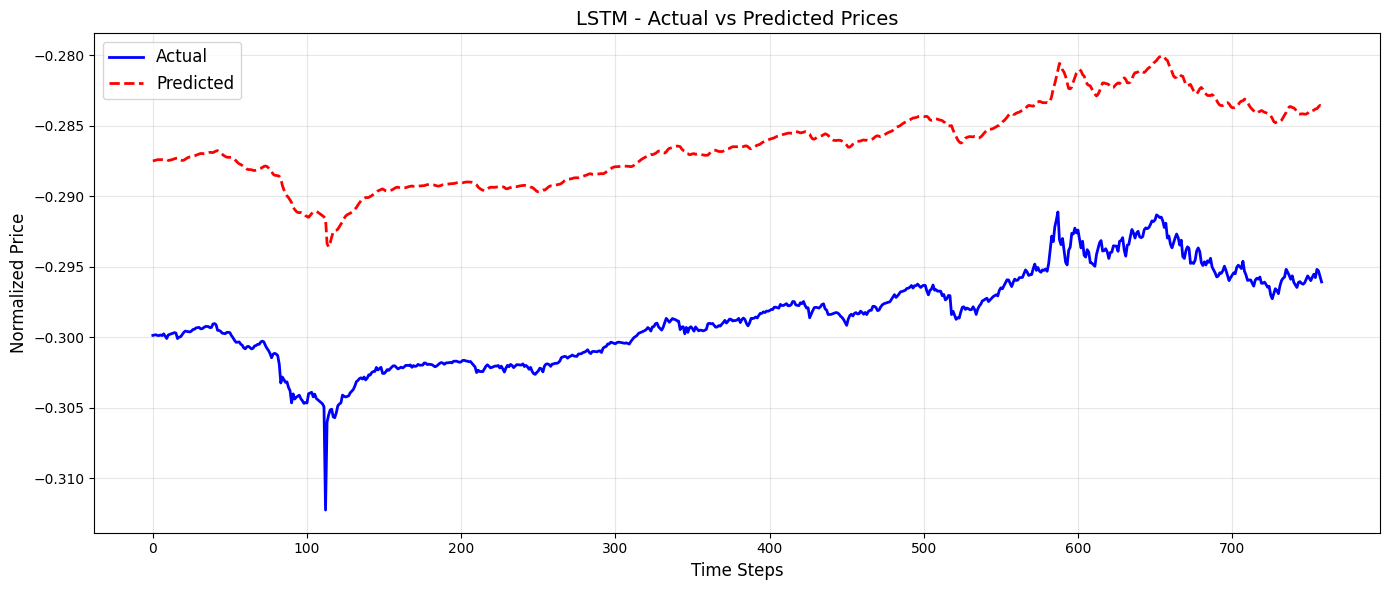

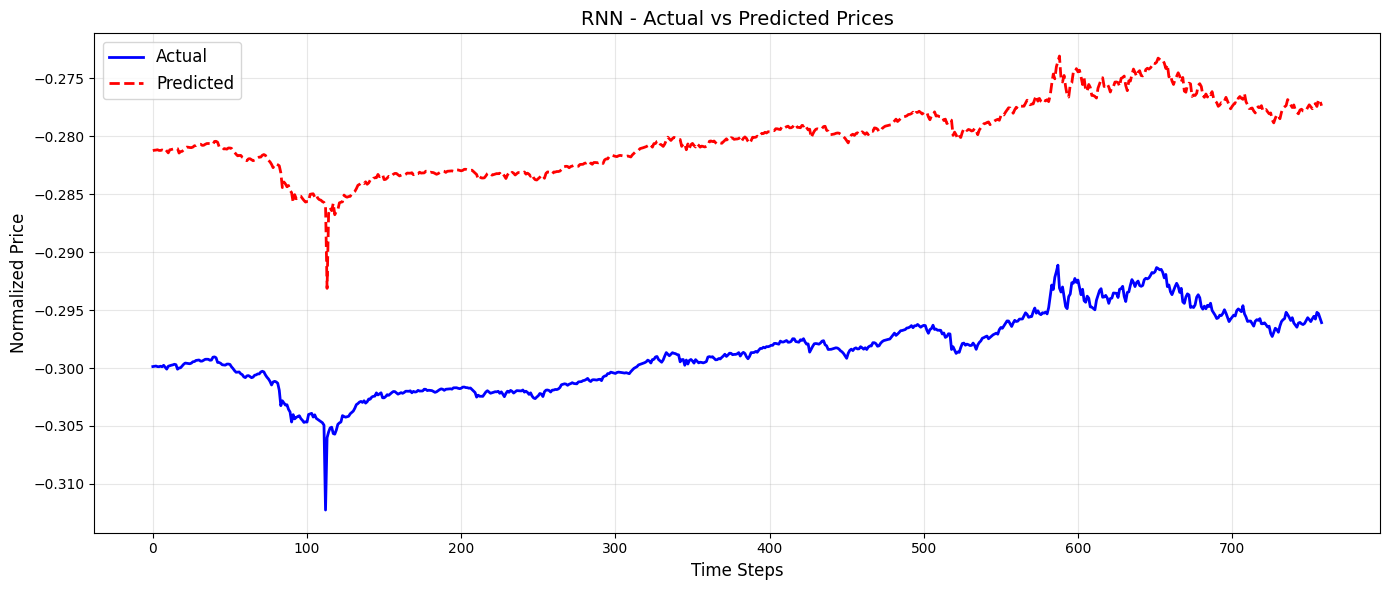

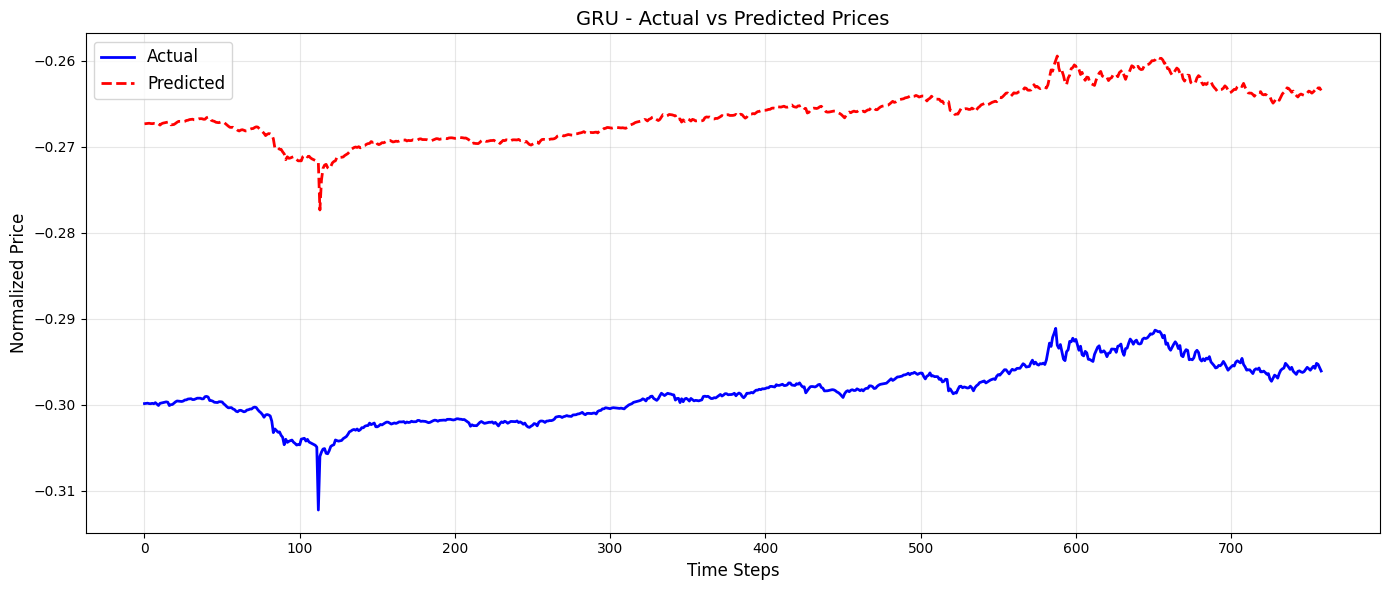

In [23]:
def plot_predictions(predictions, actual, model_name):
    plt.figure(figsize=(14, 6))
    plt.plot(actual, label='Actual', color='blue', linewidth=2)
    plt.plot(predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Normalized Price', fontsize=12)
    plt.title(f'{model_name} - Actual vs Predicted Prices', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    #TO DO

#TO DO: plot all models predictions on all data
plot_predictions(lstm_predictions, lstm_actuals, 'LSTM')
plot_predictions(rnn_predictions, rnn_actuals, 'RNN')
plot_predictions(gru_predictions, gru_actuals, 'GRU')

### 📊 3.2 Error Metrics
📌 Explain the following **error metrics** used in the paper:
- `RMSE` (Root Mean Square Error)
- `MAE` (Mean Absolute Error)
- `MAPE` (Mean Absolute Percentage Error)
- `R-Squared` (Coefficient of Determination)

**📌 Instruction:**  
Explain each of these error metrics and calculate them for **each model** (RNN, LSTM, GRU). Compare your results with the paper’s findings to see how closely they match.

🛠 *Your task:* Implement the evaluation metrics below. (15 Points)

In [24]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(predictions, actual):
    # Flatten arrays if needed
    predictions = predictions.flatten()
    actual = actual.flatten()
    
    # RMSE: Root Mean Square Error - measures the square root of average squared differences
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    
    # MAE: Mean Absolute Error - measures average absolute differences
    mae = mean_absolute_error(actual, predictions)
    
    # MAPE: Mean Absolute Percentage Error - measures average percentage error
    mape = np.mean(np.abs((actual - predictions) / (actual + 1e-10))) * 100
    
    # R2: Coefficient of Determination - measures proportion of variance explained
    r2 = r2_score(actual, predictions)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }

# First, we need to inverse transform the predictions to original scale
actual_values = scaler.inverse_transform(lstm_actuals)
rnn_predictions_unscaled = scaler.inverse_transform(rnn_predictions)
lstm_predictions_unscaled = scaler.inverse_transform(lstm_predictions)
gru_predictions_unscaled = scaler.inverse_transform(gru_predictions)

print("RNN Metrics (Unscaled):", calculate_metrics(rnn_predictions_unscaled, actual_values))
print("LSTM Metrics (Unscaled):", calculate_metrics(lstm_predictions_unscaled, actual_values))
print("GRU Metrics (Unscaled):", calculate_metrics(gru_predictions_unscaled, actual_values))

RNN Metrics (Unscaled): {'RMSE': np.float64(1.6230728018809533), 'MAE': 1.6224991083145142, 'MAPE': np.float32(978.46765), 'R2': -31.75375747680664}
LSTM Metrics (Unscaled): {'RMSE': np.float64(1.0753290715114414), 'MAE': 1.0740128755569458, 'MAPE': np.float32(660.59863), 'R2': -13.376988410949707}
GRU Metrics (Unscaled): {'RMSE': np.float64(2.835363240594708), 'MAE': 2.835007905960083, 'MAPE': np.float32(1704.7434), 'R2': -98.95454406738281}


In [26]:
# Fill missing values for all features
# Re-download data with all columns
data_full = yf.download("CL=F", start="2010-01-01")

filled_data = data_full.copy()
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
    filled_data[column] = filled_data[column].interpolate(method='linear').bfill().ffill()

# Add Adj Close as Close (they're the same for futures)
filled_data['Adj Close'] = filled_data['Close'].copy()

# WE WILL USE THESE IN ARIMA PART AS INPUTS OF MODELS
train_data = filled_data.iloc[:-int(0.3 * len(filled_data))]
test_data = filled_data.iloc[-int(0.3 * len(filled_data)):]
train_target = train_data['Adj Close']
train_exog = train_data[['Open', 'High', 'Low', 'Volume']]
test_exog = test_data[['Open', 'High', 'Low', 'Volume']]

# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")
print("The series is stationary." if result[1] < 0.05 else "The series is not stationary.")

/tmp/ipykernel_55/179239860.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_full = yf.download("CL=F", start="2010-01-01")
[*********************100%***********************]  1 of 1 completed


ADF Statistic: -1.6358117642840861
p-value: 0.46445009518522434
Critical Values: {'1%': np.float64(-3.432667724508241), '5%': np.float64(-2.862564010025669), '10%': np.float64(-2.5673151114335644)}
The series is not stationary.


## 4️⃣ ARIMA Model 📉 (15 Points)

📌 Explain the **difference** between `ARIMA` and `SARIMA` models.

📌 List the **advantages** and **limitations** of `ARIMA`.

📌 Explain the **mathematical formulation** of `ARIMA`, including its **parameters**.

📌 Determine the **optimal parameters** for `ARIMA` and **report the results**.

📌 Compare the results with **Table 6** from the paper.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

🛠 *Your task:* Implement the ARIMA model below.

In [27]:
# Train ARIMA model using auto_arima
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#TO DO:Find optimal arima model using auto_arima
# Use auto_arima to find the best parameters
arima_model = auto_arima(
    train_target,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    trace=True
)

print(f"Optimal ARIMA Order: {arima_model.order}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.5 MB/s eta 0:00:00 0:00:01
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11784.629, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11612.315, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11594.831, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11782.676, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11596.064, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11596.127, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11598.831, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11592.925, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11594.161, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11594.224, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11610.393, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11596.925, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2

In [28]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="statsmodels")

#TO DO: Predict Arima outputs
# Get the optimal order from auto_arima
optimal_order = arima_model.order

# Fit ARIMA model with optimal parameters
arima_fitted = ARIMA(train_target, order=optimal_order).fit()

# Make predictions on test data
arima_predictions = []
history = list(train_target)

for i in tqdm(range(len(test_data)), desc="ARIMA Predictions"):
    # Fit model on current history
    model = ARIMA(history, order=optimal_order)
    model_fit = model.fit()
    
    # Forecast next step
    forecast = model_fit.forecast(steps=1)[0]
    arima_predictions.append(forecast)
    
    # Add actual observation to history for next iteration
    history.append(test_data['Adj Close'].iloc[i])

arima_predictions = np.array(arima_predictions)
arima_actual = test_data['Adj Close'].values

print(f"ARIMA Predictions shape: {arima_predictions.shape}")
print(f"ARIMA Actual shape: {arima_actual.shape}")

ARIMA Predictions: 100%|██████████| 1213/1213 [01:41<00:00, 11.99it/s]

ARIMA Predictions shape: (1213,)
ARIMA Actual shape: (1213,)


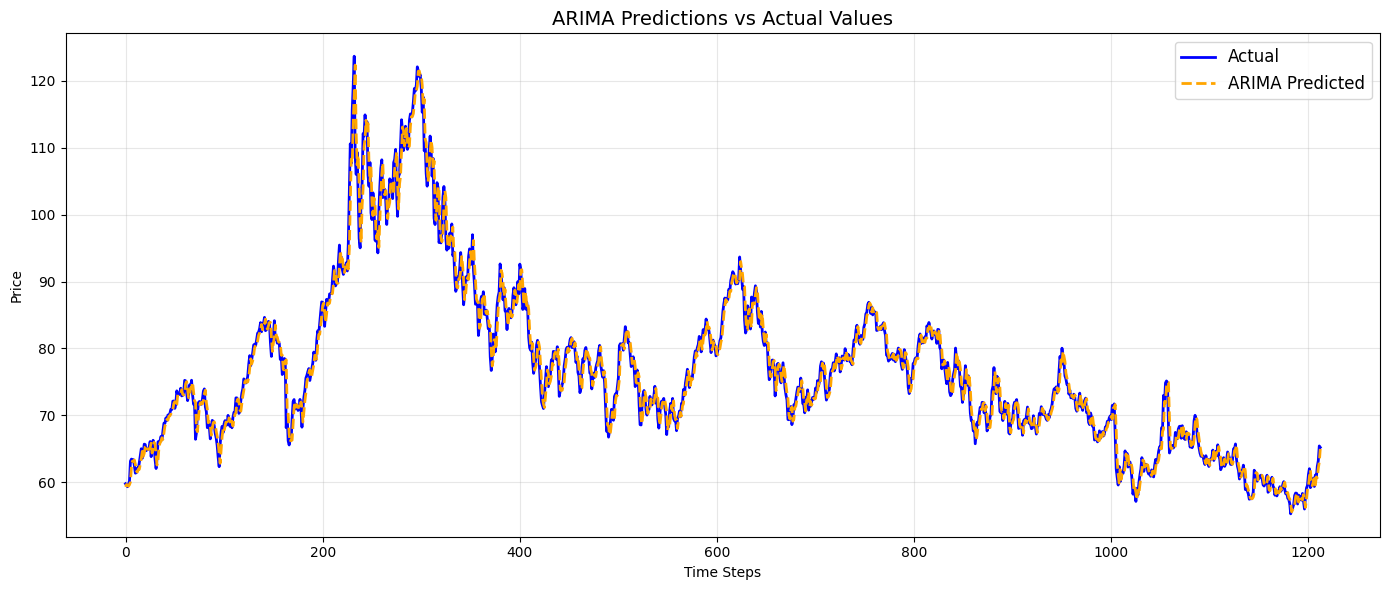

In [29]:
#TO DO: Plot ARIMA vs actual
plt.figure(figsize=(14, 6))
plt.plot(arima_actual, label='Actual', color='blue', linewidth=2)
plt.plot(arima_predictions, label='ARIMA Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.title('ARIMA Predictions vs Actual Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()